# 0.2.0 Calc UMAP

In [9]:
import sys
import importlib
import himc_helper_functions as hf
importlib.reload(hf)
hf.get_version()

0.12.3 cleaning vdj code


In [1]:
import pandas as pd

from clustergrammer2 import net

import ipywidgets as widgets
import numpy as np
from bqplot import pyplot as plt
import bqplot
from ipywidgets import HBox

from copy import deepcopy
from glob import glob
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import Voronoi

import warnings
warnings.filterwarnings('ignore')

>> clustergrammer2 backend version 0.5.15


In [3]:
# Read Metadata

df_meta = pd.read_csv('data/processed/df_meta.csv', index_col=0)
df_meta.shape

(2696, 13)

In [10]:
df_meta.columns.tolist()

['gex-umi-sum',
 'num_expressed_genes',
 'gex-ribo-avg',
 'gex-mito-avg',
 'in_tissue',
 'array_row',
 'array_col',
 'pxl_col_in_fullres',
 'pxl_row_in_fullres',
 'pos-x',
 'pos-y',
 'gex-umi-sum-norm',
 'Cell Type']

In [4]:
df_gex = pd.read_csv('data/processed/gex-z.csv', index_col=0)
df_gex.shape

(250, 2696)

In [13]:
add_cat_list = ['Cell Type']
new_cols = hf.add_cats_from_meta(add_cat_list=add_cat_list, barcodes=df_gex.columns.tolist(), df_meta=df_meta)
df_cat = deepcopy(df_gex)
df_cat.columns = new_cols

In [31]:
import umap
def make_umap_plot(df, cat_index, colors_dict, title, min_dist=1.0, n_neighbors=20, s=5.0, alpha=1.0, 
                   figsize=(10,10)):
    cols = df.columns.tolist()
    cats = [x[cat_index] for x in cols]
    list_colors = [colors_dict[x.split(': ')[1]] for x in cats]
    
    
    
    embedding = umap.UMAP(n_neighbors=n_neighbors, random_state=99,
                          min_dist=min_dist,
                          metric='correlation').fit_transform(df.transpose())
    
    df_umap = pd.DataFrame(data=embedding, columns=['x', 'y'])
    df_umap.plot(kind='scatter', x='x', y='y',  c=list_colors, alpha=alpha, s=s, figsize=figsize, 
                 title=title)
    
    return df_umap

In [32]:
net.viz = net.load_json_to_dict('data/processed/pre-calc-viz.json')
ini_cat_colors = net.viz['cat_colors']['col']['cat-0']
cat_colors = {}
for inst_key in ini_cat_colors:
    cat_colors[inst_key.split(': ')[1]] = ini_cat_colors[inst_key]

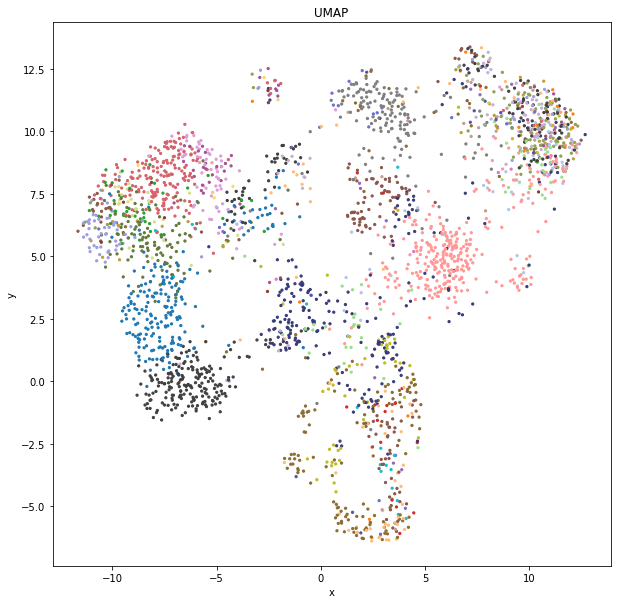

In [33]:
df_umap = make_umap_plot(df_cat, cat_index=1, title='UMAP', colors_dict=cat_colors)

In [34]:
df_umap.shape

(2696, 2)

In [38]:
df_umap.columns = ['umap-x', 'umap-y']
df_umap.index = df_gex.columns.tolist()

In [39]:
df_umap.head()

,umap-x,umap-y
AAACAAGTATCTCCCA,2.910903,7.519223
AAACACCAATAACTGC,3.265126,-1.834563
AAACAGAGCGACTCCT,-6.546222,-0.154218
AAACAGCTTTCAGAAG,3.048544,-5.838478
AAACAGGGTCTATATT,-1.102715,-3.653569


In [43]:
df_new_meta = pd.concat([df_meta, df_umap], axis=1)

In [45]:
df_new_meta.to_csv('data/processed/df_meta_v2.csv')